In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set seed for reproducibility
np.random.seed(0) 


train = pd.read_csv('data/customer_churn_dataset-training-master.csv')
train.columns = [c.replace(" ","") for c in train.columns] 

test = pd.read_csv('data/customer_churn_dataset-testing-master.csv')
test.columns = [c.replace(" ","") for c in test.columns] 

#['id', 'age', 'gender', 'tenure', 'frequency', 'calls', 'delay', 'subscription', 'contractlength', 'spend', 'lastinteraction', 'churn']
train.dtypes, test.dtypes

(CustomerID          float64
 Age                 float64
 Gender               object
 Tenure              float64
 UsageFrequency      float64
 SupportCalls        float64
 PaymentDelay        float64
 SubscriptionType     object
 ContractLength       object
 TotalSpend          float64
 LastInteraction     float64
 Churn               float64
 dtype: object,
 CustomerID           int64
 Age                 object
 Gender              object
 Tenure               int64
 UsageFrequency       int64
 SupportCalls        object
 PaymentDelay         int64
 SubscriptionType    object
 ContractLength      object
 TotalSpend           int64
 LastInteraction      int64
 Churn                int64
 dtype: object)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        440832 non-null  float64
 1   Age               440832 non-null  float64
 2   Gender            440832 non-null  object 
 3   Tenure            440832 non-null  float64
 4   UsageFrequency    440832 non-null  float64
 5   SupportCalls      440832 non-null  float64
 6   PaymentDelay      440832 non-null  float64
 7   SubscriptionType  440832 non-null  object 
 8   ContractLength    440832 non-null  object 
 9   TotalSpend        440832 non-null  float64
 10  LastInteraction   440832 non-null  float64
 11  Churn             440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        64374 non-null  int64 
 1   Age               64368 non-null  object
 2   Gender            64374 non-null  object
 3   Tenure            64374 non-null  int64 
 4   UsageFrequency    64374 non-null  int64 
 5   SupportCalls      64368 non-null  object
 6   PaymentDelay      64374 non-null  int64 
 7   SubscriptionType  64371 non-null  object
 8   ContractLength    64374 non-null  object
 9   TotalSpend        64374 non-null  int64 
 10  LastInteraction   64374 non-null  int64 
 11  Churn             64374 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 5.9+ MB


In [26]:
train[train.isna().any(axis=1)]

,CustomerID,Age,Gender,Tenure,UsageFrequency,SupportCalls,PaymentDelay,SubscriptionType,ContractLength,TotalSpend,LastInteraction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
test[test.isna().any(axis=1)]

,CustomerID,Age,Gender,Tenure,UsageFrequency,SupportCalls,PaymentDelay,SubscriptionType,ContractLength,TotalSpend,LastInteraction,Churn
71,72,NaN,Female,34,20,1,1,Basic,Annual,986,19,0
72,73,52,Female,5,12,NaN,23,Basic,Annual,844,12,0
91,92,37,Female,57,21,NaN,6,Premium,Quarterly,209,29,0
104,105,NaN,Male,10,22,9,0,Standard,Quarterly,218,7,0
111,112,41,Male,8,11,NaN,24,Premium,Monthly,900,14,0
160,161,36,Male,51,1,NaN,7,Premium,Annual,837,16,0
208,209,64,Male,13,20,NaN,22,Standard,Quarterly,749,14,0
385,386,NaN,Female,41,15,10,27,Premium,Quarterly,814,19,1
432,433,NaN,Female,9,19,4,26,Basic,Annual,805,21,0
434,435,29,Female,33,2,NaN,13,Premium,Quarterly,190,9,0


In [32]:
# get the number of missing data points per column
train_missing_values_count = train.isna().sum()
train_missing_values_count

CustomerID          1
Age                 1
Gender              1
Tenure              1
UsageFrequency      1
SupportCalls        1
PaymentDelay        1
SubscriptionType    1
ContractLength      1
TotalSpend          1
LastInteraction     1
Churn               1
dtype: int64

In [33]:
test_missing_values_count = test.isna().sum()
test_missing_values_count

CustomerID          0
Age                 6
Gender              0
Tenure              0
UsageFrequency      0
SupportCalls        6
PaymentDelay        0
SubscriptionType    3
ContractLength      0
TotalSpend          0
LastInteraction     0
Churn               0
dtype: int64

In [34]:
df[df.age.isnull()]

,id,age,gender,tenure,frequency,calls,delay,subscription,contractlength,spend,lastinteraction,churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
non_numberic_ages = df.age.str.contains('[^0-9.-]')
# df.loc[non_numberic_ages].head()
set(df.age[non_numberic_ages])

0        False
1        False
2        False
3        False
4        False
         ...  
64369    False
64370    False
64371    False
64372    False
64373    False
Name: age, Length: 64374, dtype: object

In [60]:
from sklearn.preprocessing import LabelEncoder

def labelencoder(df):
    for c in df.columns:
        if df[c].dtype=='object': 
            print("encoding",c)
            df[c] = df[c].fillna('N')
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(df[c].values)
    # return df

In [61]:
ctrain=train.dropna()
ctest=test.dropna()

In [62]:
data=pd.concat([ctrain,ctest],axis=0)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505191 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        505191 non-null  float64
 1   Age               505191 non-null  object 
 2   Gender            505191 non-null  object 
 3   Tenure            505191 non-null  float64
 4   UsageFrequency    505191 non-null  float64
 5   SupportCalls      505191 non-null  object 
 6   PaymentDelay      505191 non-null  float64
 7   SubscriptionType  505191 non-null  object 
 8   ContractLength    505191 non-null  object 
 9   TotalSpend        505191 non-null  float64
 10  LastInteraction   505191 non-null  float64
 11  Churn             505191 non-null  float64
dtypes: float64(7), object(5)
memory usage: 50.1+ MB


In [64]:
data

,CustomerID,Age,Gender,Tenure,UsageFrequency,SupportCalls,PaymentDelay,SubscriptionType,ContractLength,TotalSpend,LastInteraction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,45,Female,33.0,12.0,6,21.0,Basic,Quarterly,947.0,14.0,1.0
64370,64371.0,37,Male,6.0,1.0,5,22.0,Standard,Annual,923.0,9.0,1.0
64371,64372.0,25,Male,39.0,14.0,8,30.0,Premium,Monthly,327.0,20.0,1.0
64372,64373.0,50,Female,18.0,19.0,7,22.0,Standard,Monthly,540.0,13.0,1.0


In [65]:
labelencoder(data)
ctrain=data.iloc[0:len(ctrain)]
ctest=data.iloc[len(ctrain):]

encoding Age
encoding Gender
encoding SupportCalls
encoding SubscriptionType
encoding ContractLength


In [66]:
data

,CustomerID,Age,Gender,Tenure,UsageFrequency,SupportCalls,PaymentDelay,SubscriptionType,ContractLength,TotalSpend,LastInteraction,Churn
0,2.0,26,0,39.0,14.0,14,18.0,2,1,932.0,17.0,1.0
1,3.0,96,0,49.0,1.0,6,8.0,0,2,557.0,6.0,1.0
2,4.0,76,0,14.0,4.0,16,18.0,0,5,185.0,3.0,1.0
3,5.0,82,1,38.0,21.0,18,7.0,2,2,396.0,29.0,1.0
4,6.0,12,1,32.0,20.0,14,8.0,0,2,617.0,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370.0,55,0,33.0,12.0,15,21.0,0,5,947.0,14.0,1.0
64370,64371.0,39,1,6.0,1.0,13,22.0,2,1,923.0,9.0,1.0
64371,64372.0,15,1,39.0,14.0,19,30.0,1,2,327.0,20.0,1.0
64372,64373.0,65,0,18.0,19.0,17,22.0,2,2,540.0,13.0,1.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505191 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        505191 non-null  float64
 1   Age               505191 non-null  int64  
 2   Gender            505191 non-null  int64  
 3   Tenure            505191 non-null  float64
 4   UsageFrequency    505191 non-null  float64
 5   SupportCalls      505191 non-null  int64  
 6   PaymentDelay      505191 non-null  float64
 7   SubscriptionType  505191 non-null  int64  
 8   ContractLength    505191 non-null  int64  
 9   TotalSpend        505191 non-null  float64
 10  LastInteraction   505191 non-null  float64
 11  Churn             505191 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 50.1 MB


In [68]:
target=['Churn']
print(ctrain['Churn'].unique().tolist())
ctrainY=ctrain[target]
ctrainX=ctrain.drop(target,axis=1)
ctestX=ctest.drop(target,axis=1)

[1.0, 0.0]


In [70]:
df_columns = list(ctrainX.columns)
print(df_columns)

['CustomerID', 'Age', 'Gender', 'Tenure', 'UsageFrequency', 'SupportCalls', 'PaymentDelay', 'SubscriptionType', 'ContractLength', 'TotalSpend', 'LastInteraction']


<Axes: xlabel='UsageFrequency', ylabel='Density'>

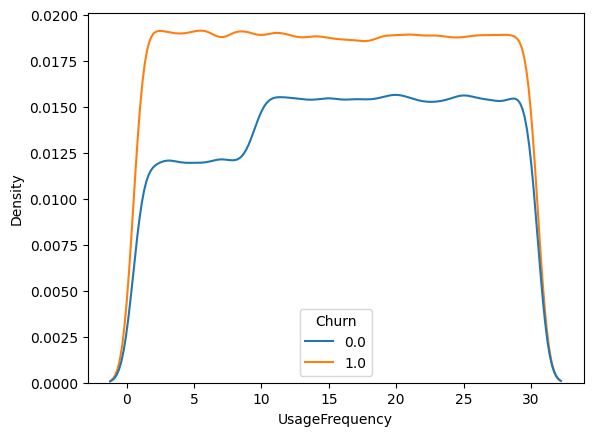

In [71]:
sns.kdeplot(data = ctrain, x = 'UsageFrequency' , hue = 'Churn')

<Axes: xlabel='TotalSpend', ylabel='Density'>

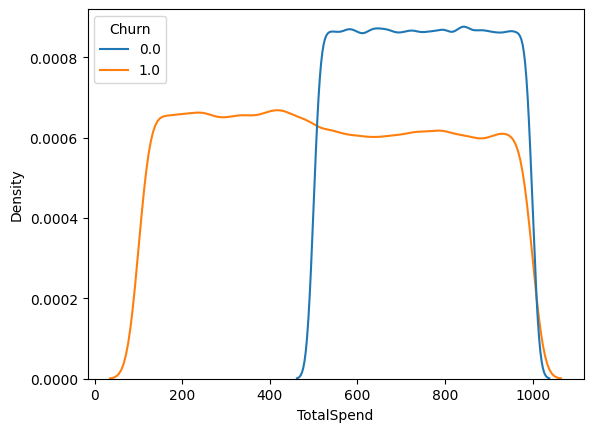

In [72]:
sns.kdeplot(data = ctrain, x = 'TotalSpend' , hue = 'Churn')

<Axes: xlabel='SupportCalls', ylabel='Density'>

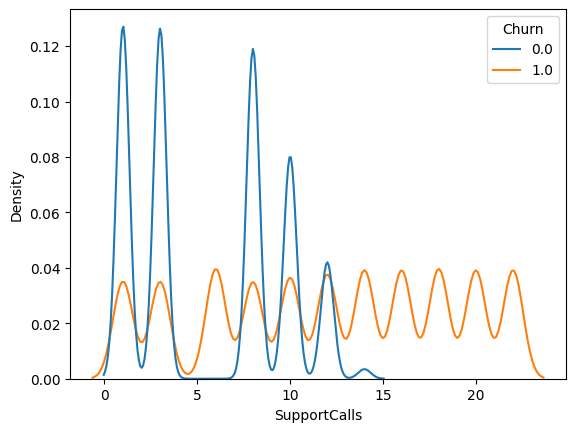

In [73]:
sns.kdeplot(data = ctrain, x = 'SupportCalls' , hue = 'Churn')

<Axes: xlabel='Age', ylabel='Density'>

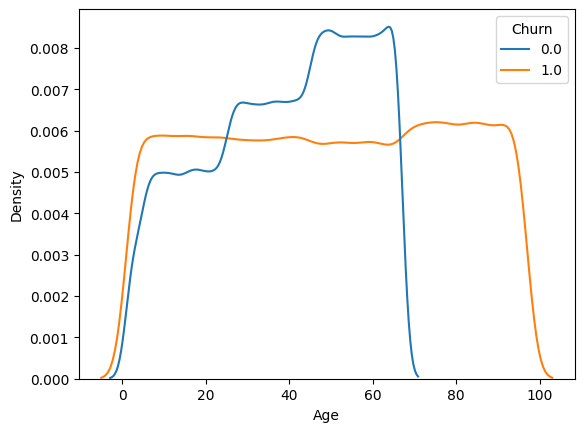

In [74]:
sns.kdeplot(data = ctrain, x = 'Age' , hue = 'Churn')

<Axes: xlabel='Gender', ylabel='Density'>

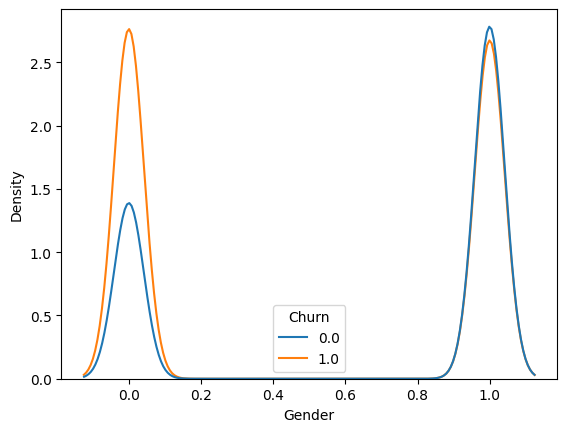

In [75]:
sns.kdeplot(data = ctrain, x = 'Gender' , hue = 'Churn')

<Axes: xlabel='Tenure', ylabel='Density'>

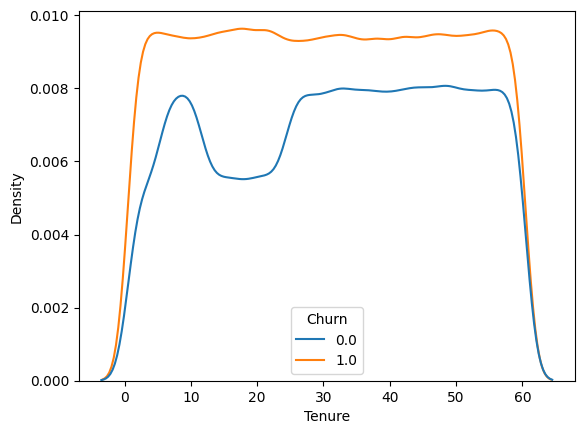

In [76]:
sns.kdeplot(data = ctrain, x = 'Tenure' , hue = 'Churn')

<Axes: xlabel='PaymentDelay', ylabel='Density'>

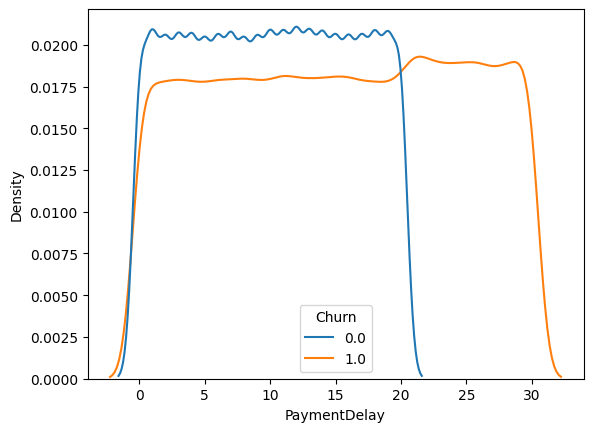

In [77]:
sns.kdeplot(data = ctrain, x = 'PaymentDelay' , hue = 'Churn')

<Axes: xlabel='SubscriptionType', ylabel='Density'>

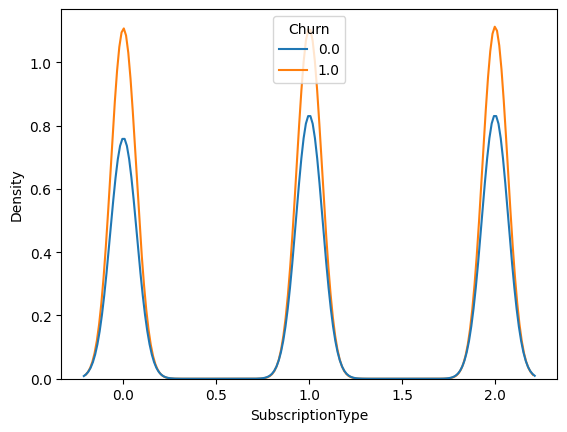

In [78]:
sns.kdeplot(data = ctrain, x = 'SubscriptionType' , hue = 'Churn')

<Axes: xlabel='ContractLength', ylabel='Density'>

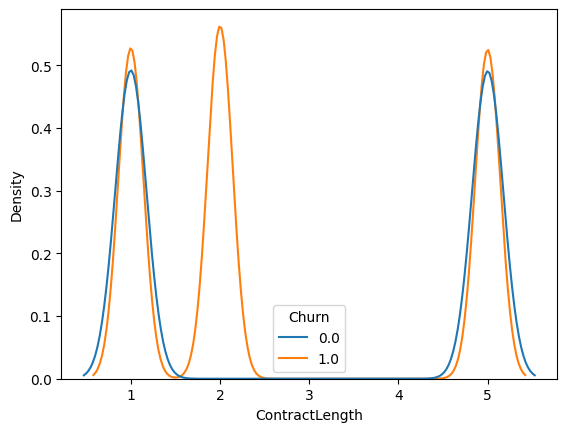

In [79]:
sns.kdeplot(data = ctrain, x = 'ContractLength' , hue = 'Churn')

<Axes: xlabel='LastInteraction', ylabel='Density'>

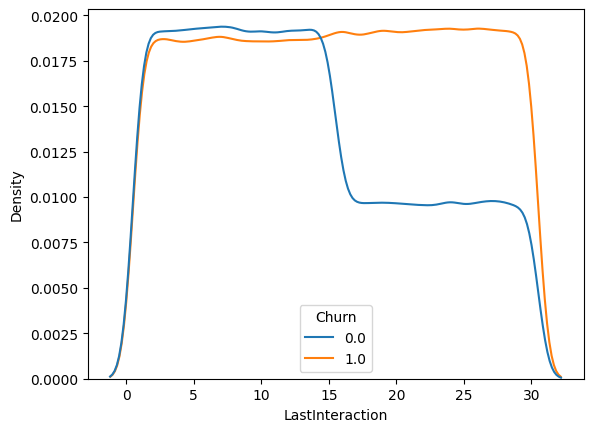

In [80]:
sns.kdeplot(data = ctrain, x = 'LastInteraction' , hue = 'Churn')